In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import uproot
import cv2
from PIL import Image
plt.style.use('seaborn-white')

In [2]:
file = uproot.open("./root_pandas/dose-rank000.root")
muonCCD1=file['muonCCD1;1']
Diffx = np.array(muonCCD1['DiffX'].array())
Diffy = np.array(muonCCD1['DiffY'].array())
eventNumber = np.array(muonCCD1['eventNumber'].array())

print('Diffx')
print('Diffx shape: ', Diffx.shape)
print('Diffy')
print('Diffy shape: ', Diffy.shape)
print('eventNumber')
print('eventNumber shape: ', eventNumber.shape)


Diffx
Diffx shape:  (163788,)
Diffy
Diffy shape:  (163788,)
eventNumber
eventNumber shape:  (163788,)


Diffx:
Diffx output histogram shape:  (4001,)
Diffy:
Diffy output histogram shape:  (4001,)


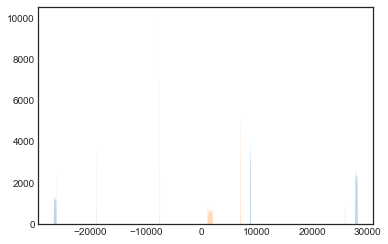

In [3]:
# Primero quiero ver independiente como se ven en un histograma que distribucion cumplen

kwargs = dict(histtype='stepfilled',alpha=0.3,bins=4000)

cx=plt.hist(Diffx,**kwargs)
cy=plt.hist(Diffy,**kwargs)
# Se puede ver en la figura el reflejo de cada componente de la simulacion tanto Diffx como Diffy

print('Diffx:')
print('Diffx output histogram shape: ',cx[1].shape)
print('Diffy:')
print('Diffy output histogram shape: ',cy[1].shape)

In [4]:
nDx=np.array(cx[1])
nDy=np.array(cy[1])

Tamaño de la imagen:  (1000, 1000)


tuple

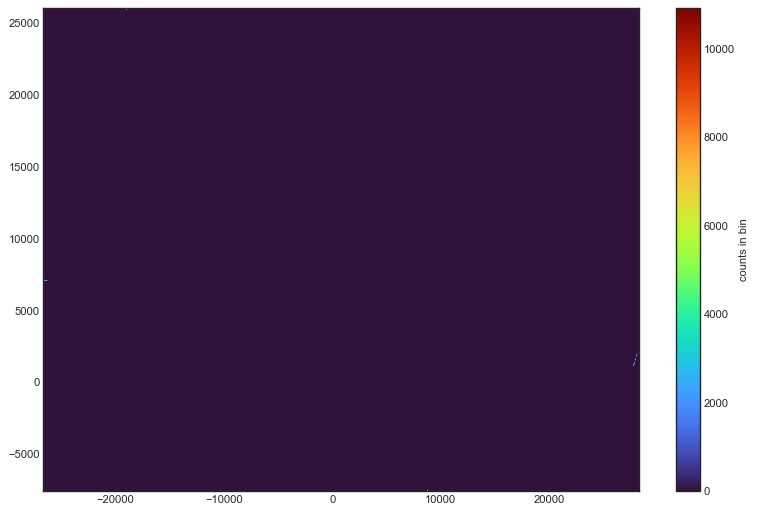

In [94]:
# Primero intentare realizar un histograma 2d con los valores dados en el histograma inicial
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
h=plt.hist2d(Diffx,Diffy,bins=(1000,1000),cmap='turbo')
cb = plt.colorbar()
cb.set_label('counts in bin')
img = np.array(h[0])
print('Tamaño de la imagen: ',img.shape)
type(h)

In [6]:
# Se Guarda una imagen del resultado
cv2.imwrite('muon.png',img)


True

(array([43411.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         8963.,     0.,     0.,     0., 39063., 72351.]),
 array([ 5.        ,  5.71428571,  6.42857143,  7.14285714,  7.85714286,
         8.57142857,  9.28571429, 10.        , 10.71428571, 11.42857143,
        12.14285714, 12.85714286, 13.57142857, 14.28571429, 15.        ]),
 [<matplotlib.patches.Polygon at 0x17de7c8b3d0>])

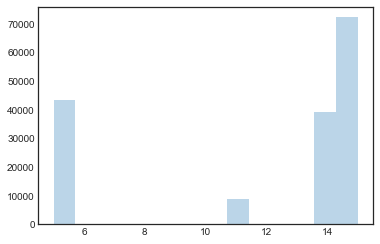

In [7]:
# Ahora vamos a trabajar con eventNumber

event_result = plt.hist(eventNumber,bins=14,histtype='stepfilled',alpha=0.3)
event_result


In [8]:
# En la siguiente seccion vamos a estar
eventos_unicos = np.unique(eventNumber)
inicial=False
ant= 0
final=False
coord=[0,0]

obj = 5 

for i,e in enumerate(eventNumber):
    uniq = np.unique(eventNumber[coord[0]:i])
    
    if(e==obj & len(uniq)==1 & ~(inicial) & eventNumber[i]==eventNumber[i+1] & ~final):
        coord.append(i)
        inicial=True
    if(inicial):
        if(e!=obj & len(uniq)!=1 & ~final & eventNumber[i]!=eventNumber[i-1]):
            coord.append(i)
            final=True
    if(~inicial & len(uniq)!=1):
        coord[0]=i
    
    
print(coord)


[91438, 0]


In [9]:

len(np.unique(eventNumber[0:43411]))

1

Tamaño de la imagen:  (1000, 1000)


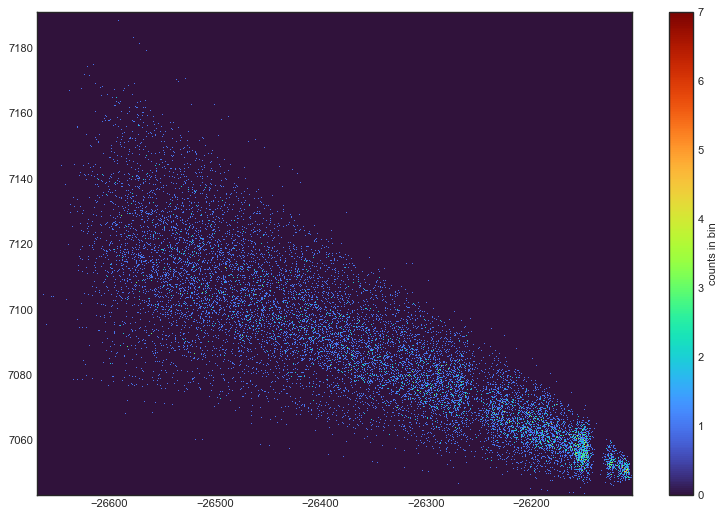

In [28]:
testx = Diffx[0:43411]
testy = Diffy[0:43411]
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
h=plt.hist2d(testx,testy,bins=(1000,1000),cmap='turbo')
cb = plt.colorbar()
cb.set_label('counts in bin')
img = np.array(h[0])
print('Tamaño de la imagen: ',img.shape)

## PLT SCATTER
Probe a manopla cada evento para graficar y ver que sale

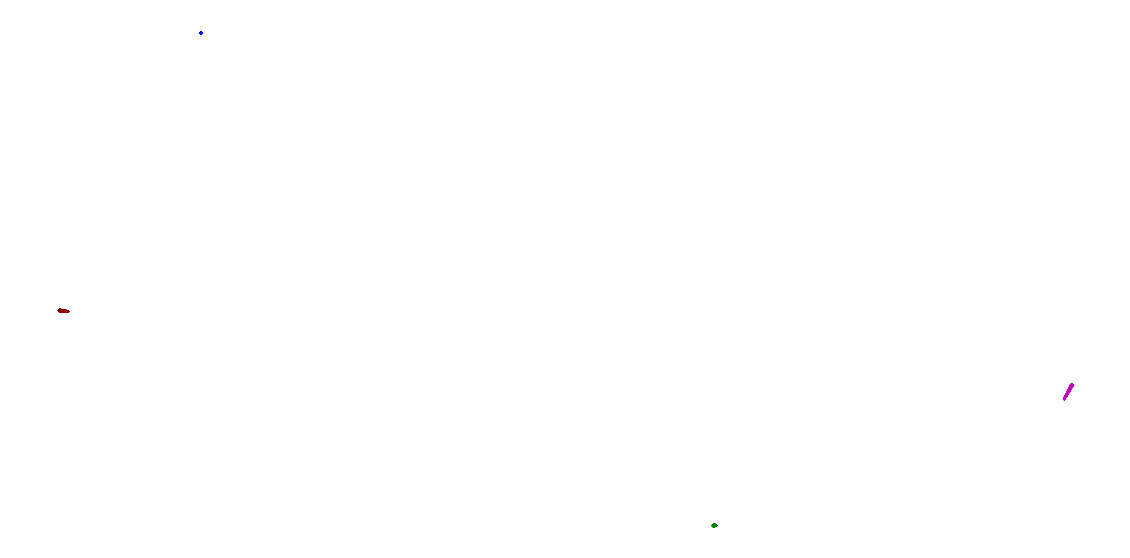

In [103]:
testx5 = Diffx[0:43411]
testy5 = Diffy[0:43411]
test5 = eventNumber[0:43411]
testx11 = Diffx[43412:52373]
testy11 = Diffy[43412:52373]
test11= eventNumber[43412:52373]
testx14 = Diffx[52374:91436]
testy14 = Diffy[52374:91436]
testx15 = Diffx[91437:163787]
testy15 = Diffy[91437:163787]
plt.figure(figsize=(20,10))
plt.scatter(testx5, testy5, s=0.05 , c='DarkRed')
plt.scatter(testx11, testy11, s=0.05 , c='b')
plt.scatter(testx14, testy14, s=0.05 , c='g')
plt.scatter(testx15, testy15, s=0.05 , c='m')
plt.axis('off') 
plt.savefig('hola.png', dpi=400)
plt.show()

In [72]:
eventNumber[0:43412]
x = []
for i,e in enumerate(eventNumber):
    if e==15:
        x.append(i)

In [78]:
x[-1]
# 52373 evento 11
# 91436 evento 14
eventNumber[52374:91436]

eventNumber[91436]

eventNumber[91437:163787]

IndexError: index 163788 is out of bounds for axis 0 with size 163788